# Qiskit notebook

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.extensions import HamiltonianGate
import numpy as np
import qiskit.tools.jupyter
%qiskit_version_table

# Circuits and measurements
Create quantum states:

In [2]:
# number of qubits
nq = 2

# create quantum state
psi = Statevector([0,1,0,0], 2**nq) # Statevector(vector, dimension = 2^(# qubits))
print("\nBraket notation:")
display(psi.draw('latex'))
print("\nVector notation:")
display(array_to_latex(psi))


Braket notation:


<IPython.core.display.Latex object>


Vector notation:


<IPython.core.display.Latex object>

Create circuit (no measurements):


Visualize circuit:


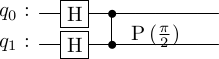

In [3]:
# measurement circuit
circ = QuantumCircuit(nq) # quantum circuit on nq qubits
circ.h(0) # Hadamard gate on qubit 0
circ.h(1) # Hadamard gate on qubit 1
circ.cp(np.pi/2,0,1) # phase gate (angle pi/2) on qubit 1, controlled on qubit 0
print("\nVisualize circuit:")
display(circ.draw('latex'))

In [4]:
U = Operator(circ) # turn quantum circuit into matrix
print("\n(Unitary) matrix representation:")
array_to_latex(U)


(Unitary) matrix representation:


<IPython.core.display.Latex object>

In [5]:
state = psi.evolve(circ) # apply quantum circuit "circ" to state "psi"
print("\n output:")
state.draw('latex')


 output:


<IPython.core.display.Latex object>

## Simulate circuit
Prepend initialization:


Visualize circuit with measurements and initialization:


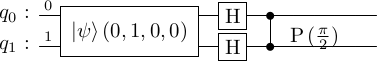

In [6]:
init = QuantumCircuit(nq)
init.initialize(psi) # hardcode initial state "psi" into circuit "init"
circ2 = circ.compose(init, range(nq), front=True) # compose the circuits "init" and "circ"
print("\nVisualize circuit with measurements and initialization:")
display(circ2.draw('latex'))

Add measurements:


Visualize circuit with measurements:


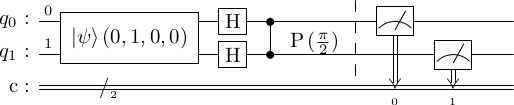

In [7]:
meas = QuantumCircuit(nq, nq) # measurement circuit on nq qubits and nq "readout" classical bits
meas.barrier(range(nq)) # visual dashed line
meas.measure(range(nq), range(nq)) # measure qubits 0 and 1, write output in classical bits 0 and 1 (resp.)
circ3 = circ2.compose(meas, range(nq)) # compose with previous circuit

print("\nVisualize circuit with measurements:")
circ3.draw('latex')

Compile and run the circuit:


Measurement counts (out of 2000): {'11': 520, '10': 482, '00': 525, '01': 473}


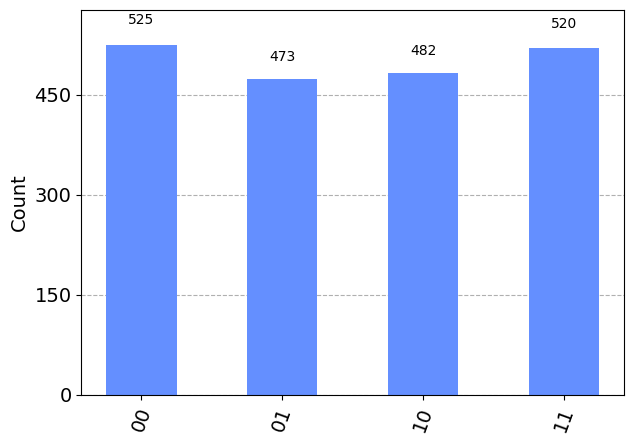

In [8]:
# transpile for simulator
simulator = Aer.get_backend('aer_simulator') # aer_simulator is a classical simulator for quantum circuits
circ3 = transpile(circ3, simulator) # transpile circuit in simulator language

# simulate circuit and get data
result = simulator.run(circ3, shots=2000).result()
counts = result.get_counts()
print("\nMeasurement counts (out of 2000):",counts)
plot_histogram(counts)

## Exercises on circuits

 - verify the outcome of the following circuits:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex1.png" width="300">
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex2.png" width="400"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex3.png" width="400"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex4.png" width="500"/>
</div>

 - verify your solution: \
 *(! note that qiskit uses reverse order on qubits, see  https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html#Visualize-Circuit)*
 
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/CNOT.png" width="500"/>
</div>

 - verify the outcome state of the following circuits:
 
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex5.png" width="200"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex6.png" width="300"/>
</div>

## QFT exercise
verify circuit for 2-qubit quantum Fourier transform:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/F4.png" width="400">
</div>

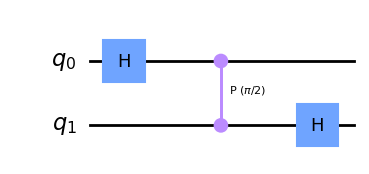


(Unitary) matrix representation:


<IPython.core.display.Latex object>

Operator([[ 5.000000e-01+0.j ,  5.000000e-01+0.j ,  5.000000e-01+0.j ,
            5.000000e-01+0.j ],
          [ 5.000000e-01+0.j , -5.000000e-01+0.j ,  3.061617e-17+0.5j,
           -3.061617e-17-0.5j],
          [ 5.000000e-01+0.j ,  5.000000e-01+0.j , -5.000000e-01+0.j ,
           -5.000000e-01+0.j ],
          [ 5.000000e-01+0.j , -5.000000e-01+0.j , -3.061617e-17-0.5j,
            3.061617e-17+0.5j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [23]:
QFT = QuantumCircuit(2)
QFT.h(0) # hadamard on q1
QFT.cp(np.pi/2,0,1) # pi/2-rotation of q2 controlled on q1
QFT.h(1) # hadamard on q1
# QFT.swap(0,1) # swap on q1 and q2

display(QFT.draw(output='mpl'))
U = Operator(QFT)
print("\n(Unitary) matrix representation:")
display(array_to_latex(U))
print(U)

# Hamiltonian simulation

Qiskit has functionality for Hamiltonian simulation:

In [10]:
HamSim = QuantumCircuit(1)
expH = HamiltonianGate([[0,1],[1,0]],1) # HamiltonianGate(matrix H,time t) implements exp(-iHt)
HamSim = HamSim.compose(expH, [0])
HamSim.draw('latex')

## Exercises Hamiltonian simulation
 - verify the following equations:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/XHZH.png" width="500"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/expZ.png" width="500"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/expX.png" width="500"/>
</div>

 - verify noncommutativity: (e.g. for $H = H_1 + H_2 = X + Z$)
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/noncom.png" width="400">
</div>

 - verify Lie-Trotter formula:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/Trotter.png" width="600">
</div>

# QAOA

## Ising Hamiltonian
Consider a graph $G=(V,E)$ and corresponding Ising Hamiltonian $H_Z = \sum_{i<j:(i,j) \in E} Z_i Z_j$. Show that the ground state of $H_Z$ describes a maximum cut in $G$.

Now consider the particular graph $G$ with adjacency matrix
$$
\begin{bmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0
\end{bmatrix}.
$$
Encode the corresponding Ising Hamiltonian.

In [13]:
from qiskit.quantum_info import Pauli

# define Z_i Z_j's
E12 = Pauli('IIZZ').to_matrix() # edge (1,2) <-> operator Z_1 Z_2 (recall inverse ordering)
E13 = Pauli('IZIZ').to_matrix()
E14 = Pauli('ZIIZ').to_matrix()
E23 = Pauli('IZZI').to_matrix()
E24 = Pauli('ZIZI').to_matrix()

# create cost Hamiltonian
Hz = E12 + E13 + E14 + E23 + E24
display(array_to_latex(Hz))

<IPython.core.display.Latex object>

## Variational circuit

create parameterized Hamiltonian gate $e^{-i \theta H_Z}$ called circHz:

In [14]:
from qiskit.circuit import Parameter

theta = Parameter('theta')
expHz = HamiltonianGate(Hz,theta)
circHz = QuantumCircuit(4, name='Hz')
circHz = circHz.compose(expHz)

create mixer Hamiltonian $H_X = \sum_i X_i$ and parameterized Hamiltonian gate $e^{-i \phi H_X}$ called circHx:

In [17]:
X1 = Pauli('IIIX').to_matrix()
X2 = Pauli('IIXI').to_matrix()
X3 = Pauli('IXII').to_matrix()
X4 = Pauli('XIII').to_matrix()
Hx = X1 + X2 + X3 + X4

phi = Parameter('phi')
expHx = HamiltonianGate(Hx,phi)
circHx = QuantumCircuit(4, name='Hx')
circHx = circHx.compose(expHx)

compose layers:

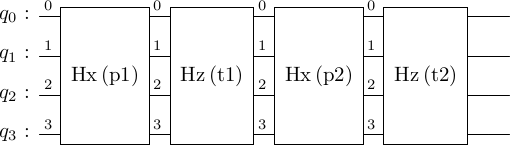

In [18]:
t1 = Parameter('t1')
t2 = Parameter('t2')
p1 = Parameter('p1')
p2 = Parameter('p2')

QAOA = QuantumCircuit(4)
QAOA = QAOA.compose(circHx.to_instruction({phi: p1}))
QAOA = QAOA.compose(circHz.to_instruction({theta: t1}))
QAOA = QAOA.compose(circHx.to_instruction({phi: p2}))
QAOA = QAOA.compose(circHz.to_instruction({theta: t2}))
display(QAOA.draw('latex'))

add measurement to QAOA circuit:

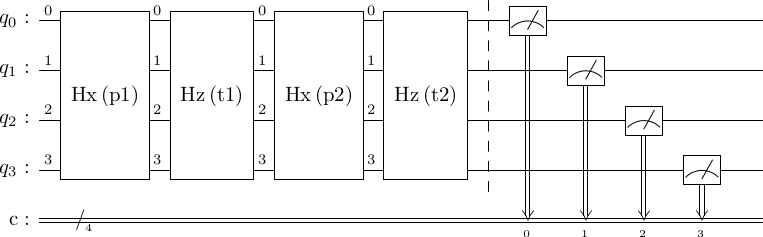

In [19]:
meas = QuantumCircuit(4, 4)
meas.barrier(range(4))
meas.measure(range(4), range(4))
QAOA = QAOA.compose(meas)
display(QAOA.draw('latex'))

simulate using Aer simulator:


Measurement counts (out of 10000): {'0111': 620, '0010': 1503, '0001': 1506, '0100': 888, '1100': 1364, '0000': 148, '1000': 929, '1111': 1568, '0011': 316, '1011': 632, '0101': 134, '1001': 135, '1010': 129, '0110': 111, '1110': 8, '1101': 9}


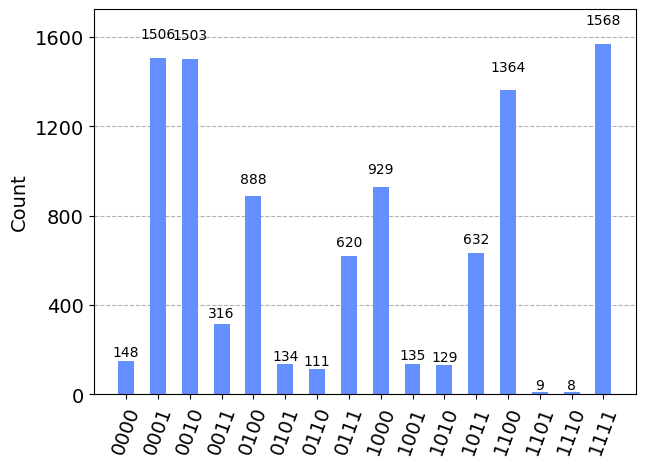

In [20]:
# fix parameters
circ = QAOA.bind_parameters(
        {t1: 1/5*np.pi, t2: 0, p1: 1/4*np.pi, p2: 0.6*np.pi})

# transpile, run and plot statistics
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ, shots=10000).result()
counts = result.get_counts()
print("\nMeasurement counts (out of 10000):",counts)
plot_histogram(counts)

## Extra:
 - QAOA on larger depth, more vertices
 - combine with optimizer (for an example, see notebook by Ruslan Shaydulin: https://simonapers.github.io/mckinsey/QAOA-shaydulin.ipynb)